In [37]:
from astropy.io import fits
import glob
import numpy as np

In [38]:
ffi_list = glob.glob("../data/tess_ffi/20_3_3/*.fits")

In [17]:
header = fits.getheader(ffi_list[0], ext=1)

In [40]:
# Extract specified WCS header keys from each FITS in `ffi_list` and save to CSV
import os
import re
import pandas as pd
from astropy.io import fits

# Short explicit list of WCS keys to always include
explicit_keys = {
    "DATE-OBS",
    "CRVAL1",
    "CRVAL2",
    "CRPIX1",
    "CRPIX2",
    "CD1_1",
    "CD1_2",
    "CD2_1",
    "CD2_2",
    "A_ORDER",
    "B_ORDER",
    "AP_ORDER",
    "BP_ORDER",
    "A_DMAX",
    "B_DMAX",
}

# Regex patterns to automatically match coefficient-like keys: A_N_M, B_N_M, AP_N_M, BP_N_M
coeff_patterns = [
    re.compile(r"^[AB]_[0-9]+_[0-9]+$"),
    re.compile(r"^AP_[0-9]+_[0-9]+$"),
    re.compile(r"^BP_[0-9]+_[0-9]+$"),
]

try:
    from tqdm.notebook import tqdm as _tqdm
except Exception:
    try:
        from tqdm import tqdm as _tqdm
    except Exception:
        _tqdm = None

rows = []
iterable = sorted(ffi_list)
if _tqdm is not None:
    iterator = _tqdm(iterable, desc="Reading FITS files")
else:
    iterator = iterable

for f in iterator:
    try:
        header = fits.getheader(f, ext=1)
    except Exception as e:
        rows.append({"filename": os.path.basename(f), "path": os.path.abspath(f), "_error": str(e)})
        continue

    row = {"filename": os.path.basename(f), "path": os.path.abspath(f)}

    # Find keys that match explicit list or coefficient patterns
    matched_keys = set()
    for hk in header.keys():
        if hk in explicit_keys:
            matched_keys.add(hk)
            continue
        for pat in coeff_patterns:
            if pat.match(hk):
                matched_keys.add(hk)
                break

    # Sort keys for consistent column order
    for k in sorted(matched_keys):
        row[k] = header.get(k)

    rows.append(row)

if rows:
    df = pd.DataFrame(rows)
    # Save next to this notebook (current working directory in notebook server)
    out_path = os.path.join(os.getcwd(), "wcs_headers_selected.csv")
    df.to_csv(out_path, index=False)
    print(f"Saved {len(df)} rows to: {out_path}")
else:
    print("No rows to save; no FITS matched or headers could not be read.")


Reading FITS files:   0%|          | 0/1188 [00:00<?, ?it/s]

Saved 1188 rows to: /home/kshukawa/syndiff/notebooks/wcs_headers_selected.csv


In [41]:
df

,filename,path,DATE-OBS,AP_0_1,AP_0_2,AP_0_3,AP_0_4,AP_1_0,AP_1_1,AP_1_2,...,B_DMAX,B_ORDER,CD1_1,CD1_2,CD2_1,CD2_2,CRPIX1,CRPIX2,CRVAL1,CRVAL2
0,tess2019358235923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2019-12-25T00:01:35.619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tess2019359002923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2019-12-25T00:31:35.649,-0.000056,-0.000003,5.113998e-10,-1.852429e-13,-0.000086,-0.000017,4.003635e-09,...,47.823939,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.754305,76.392059
2,tess2019359005923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2019-12-25T01:01:35.678,-0.000056,-0.000003,5.109983e-10,-1.859410e-13,-0.000086,-0.000017,4.003316e-09,...,47.824299,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.754334,76.392054
3,tess2019359012923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2019-12-25T01:31:35.708,-0.000056,-0.000003,5.116880e-10,-1.853474e-13,-0.000086,-0.000017,4.003180e-09,...,47.818535,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.754376,76.392042
4,tess2019359015923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2019-12-25T02:01:35.738,-0.000056,-0.000003,5.111753e-10,-1.860580e-13,-0.000086,-0.000017,4.003589e-09,...,47.821840,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.754373,76.392049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,tess2020020045923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2020-01-20T05:01:59.297,-0.000056,-0.000003,5.158705e-10,-1.920447e-13,-0.000085,-0.000017,4.002196e-09,...,47.848722,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.752249,76.392678
1184,tess2020020052923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2020-01-20T05:31:59.303,-0.000056,-0.000003,5.161791e-10,-1.924588e-13,-0.000085,-0.000017,4.002276e-09,...,47.848525,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.752253,76.392673
1185,tess2020020055923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2020-01-20T06:01:59.310,-0.000056,-0.000003,5.161445e-10,-1.917405e-13,-0.000085,-0.000017,4.002089e-09,...,47.848706,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.752252,76.392677
1186,tess2020020062923-s0020-3-3-0165-s_ffic.fits,/home/kshukawa/syndiff/data/tess_ffi/20_3_3/te...,2020-01-20T06:31:59.316,-0.000056,-0.000003,5.161300e-10,-1.913548e-13,-0.000085,-0.000017,4.002077e-09,...,47.849221,4.0,0.002161,-0.005333,0.00528,0.002026,1045.0,1001.0,216.752252,76.392678


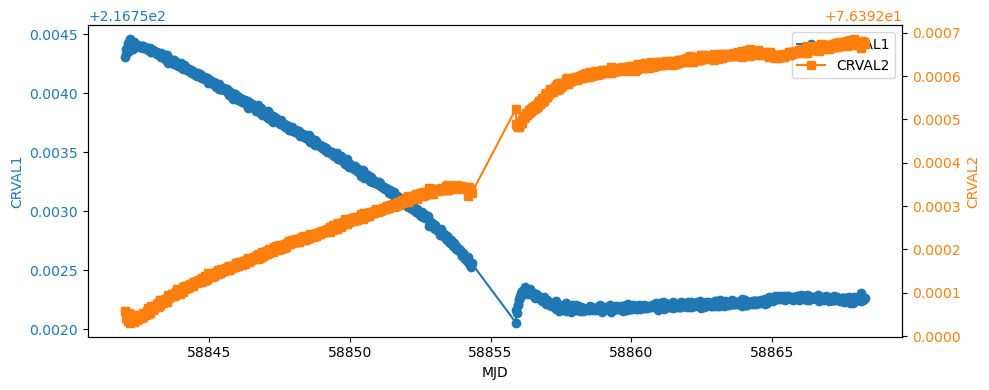

In [42]:
import matplotlib.pyplot as plt
from astropy.time import Time

# Convert DATE-OBS to MJD (robustly)
if "DATE-OBS" in df.columns:
    df["MJD"] = pd.NA
    # prepare string values, handle None/NaN
    date_vals = df["DATE-OBS"].astype(str).replace({"None": None, "nan": None})
    mask = date_vals.notna()
    if mask.any():
        try:
            t = Time(date_vals[mask].tolist())
            df.loc[mask, "MJD"] = t.mjd
        except Exception:
            # fallback via pandas datetimes
            dt = pd.to_datetime(df["DATE-OBS"], errors="coerce")
            mask2 = dt.notna()
            if mask2.any():
                t = Time(dt[mask2].astype("datetime64[ns]"))
                df.loc[mask2, "MJD"] = t.mjd
    df["MJD"] = pd.to_numeric(df["MJD"], errors="coerce")
else:
    df["MJD"] = pd.NA

# Check required columns
for col in ("CRVAL1", "CRVAL2"):
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in dataframe")

x = df["MJD"]
y1 = pd.to_numeric(df["CRVAL1"], errors="coerce")
y2 = pd.to_numeric(df["CRVAL2"], errors="coerce")

# Mask rows where x or both y are missing
mask = x.notna() & (y1.notna() | y2.notna())
if not mask.any():
    raise RuntimeError("No valid MJD and CRVAL data to plot")

xplot = x[mask].astype(float)
y1plot = y1[mask]
y2plot = y2[mask]

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(xplot, y1plot, color="tab:blue", marker="o", label="CRVAL1")
ax1.set_xlabel("MJD")
ax1.set_ylabel("CRVAL1", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(xplot, y2plot, color="tab:orange", marker="s", label="CRVAL2")
ax2.set_ylabel("CRVAL2", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

fig.tight_layout()
plt.show()


In [34]:
0.0007 * 60 * 60 / 21

0.12

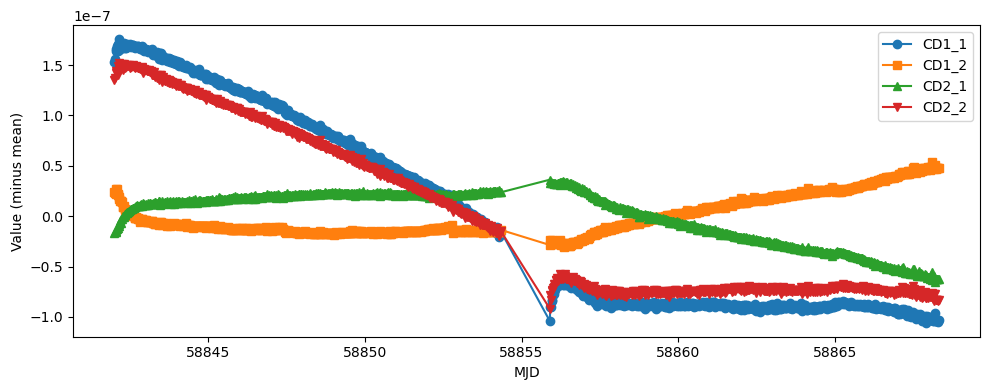

In [43]:
# Convert DATE-OBS to MJD if not already present (re-use logic from earlier cell)
from astropy.time import Time

if "MJD" not in df.columns:
    if "DATE-OBS" in df.columns:
        df["MJD"] = pd.NA
        date_vals = df["DATE-OBS"].astype(str).replace({"None": None, "nan": None})
        mask = date_vals.notna()
        if mask.any():
            try:
                t = Time(date_vals[mask].tolist())
                df.loc[mask, "MJD"] = t.mjd
            except Exception:
                dt = pd.to_datetime(df["DATE-OBS"], errors="coerce")
                mask2 = dt.notna()
                if mask2.any():
                    t = Time(dt[mask2].astype("datetime64[ns]"))
                    df.loc[mask2, "MJD"] = t.mjd
        df["MJD"] = pd.to_numeric(df["MJD"], errors="coerce")
    else:
        df["MJD"] = pd.NA

# Check required columns
for col in ("CD1_1", "CD1_2", "CD2_1", "CD2_2"):
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in dataframe")

x = df["MJD"]
y_cd11 = pd.to_numeric(df["CD1_1"], errors="coerce")
y_cd12 = pd.to_numeric(df["CD1_2"], errors="coerce")
y_cd21 = pd.to_numeric(df["CD2_1"], errors="coerce")
y_cd22 = pd.to_numeric(df["CD2_2"], errors="coerce")

mask = x.notna() & (y_cd11.notna() | y_cd12.notna() | y_cd21.notna() | y_cd22.notna())
if not mask.any():
    raise RuntimeError("No valid MJD and CD* data to plot")

xplot = x[mask].astype(float)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(xplot, (y_cd11 - np.nanmean(y_cd11))[mask], marker="o", label="CD1_1")
ax.plot(xplot, (y_cd12 - np.nanmean(y_cd12))[mask], marker="s", label="CD1_2")
ax.plot(xplot, (y_cd21 - np.nanmean(y_cd21))[mask], marker="^", label="CD2_1")
ax.plot(xplot, (y_cd22 - np.nanmean(y_cd22))[mask], marker="v", label="CD2_2")
ax.set_xlabel("MJD")
ax.set_ylabel("Value (minus mean)")
ax.legend(loc="upper right")

fig.tight_layout()
plt.show()


In [48]:
(2.5 * 10**-7) * (1045 + 1001) * 60 * 60 / 21

0.0876857142857143

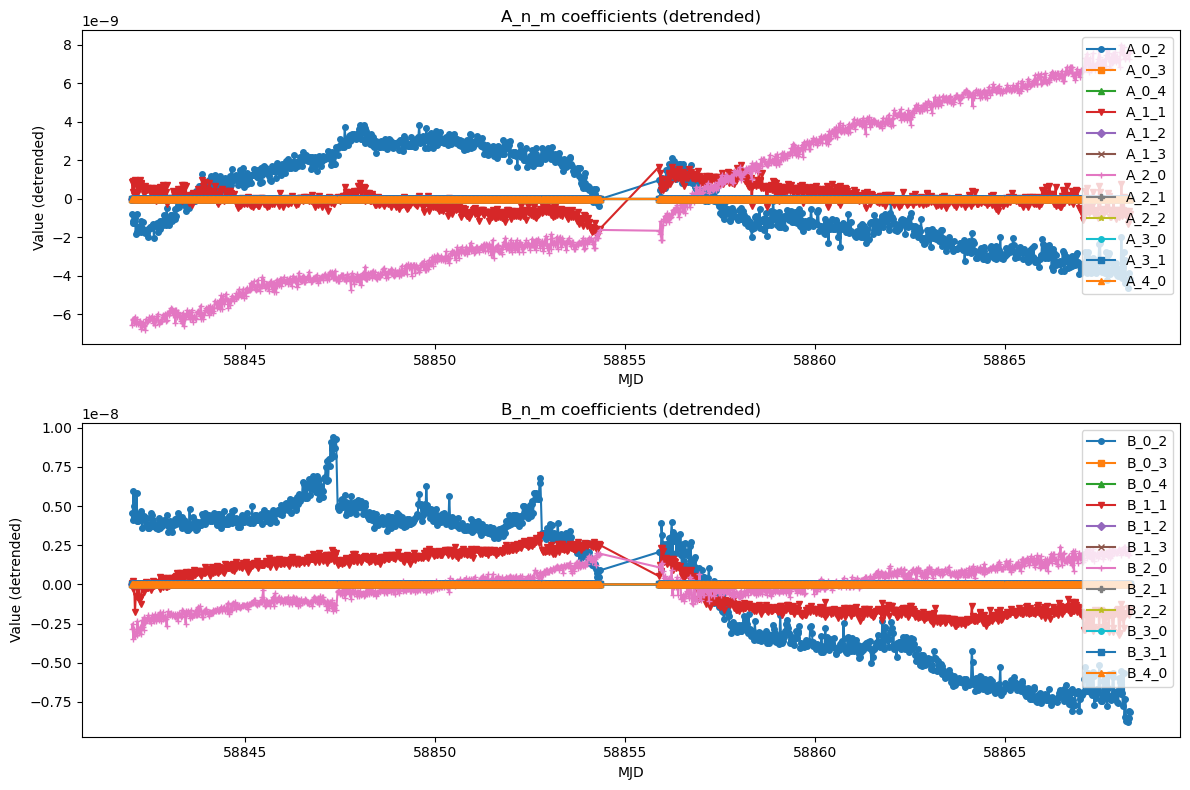

In [44]:
# Plot A_n_m and B_n_m coefficient series similarly to the CD* plot above, using MJD as x-axis
from astropy.time import Time

if "MJD" not in df.columns:
    if "DATE-OBS" in df.columns:
        df["MJD"] = pd.NA
        date_vals = df["DATE-OBS"].astype(str).replace({"None": None, "nan": None})
        mask = date_vals.notna()
        if mask.any():
            try:
                t = Time(date_vals[mask].tolist())
                df.loc[mask, "MJD"] = t.mjd
            except Exception:
                dt = pd.to_datetime(df["DATE-OBS"], errors="coerce")
                mask2 = dt.notna()
                if mask2.any():
                    t = Time(dt[mask2].astype("datetime64[ns]"))
                    df.loc[mask2, "MJD"] = t.mjd
        df["MJD"] = pd.to_numeric(df["MJD"], errors="coerce")
    else:
        df["MJD"] = pd.NA

# regex to match coefficient-like keys
coeff_re = re.compile(r"^[AB]_[0-9]+_[0-9]+$")

# collect and sort A_ and B_ columns
a_cols = sorted([c for c in df.columns if coeff_re.match(c) and c.startswith("A_")])
b_cols = sorted([c for c in df.columns if coeff_re.match(c) and c.startswith("B_")])

if not a_cols and not b_cols:
    raise KeyError("No A_n_m or B_n_m columns found in dataframe")

x = df["MJD"]
mask_common = x.notna()

if not mask_common.any():
    raise RuntimeError("No valid MJD values for coefficient plotting")


# convenience for plotting a collection of columns on an axis
def plot_coeffs(ax, cols, title):
    if not cols:
        return
    # convert to numeric and detrend (subtract mean)
    data = df[cols].apply(pd.to_numeric, errors="coerce")
    for i, col in enumerate(cols):
        y = data[col] - np.nanmean(data[col])
        # align mask to x
        mask = x.notna() & y.notna()
        if not mask.any():
            continue
        marker = ["o", "s", "^", "v", "D", "x", "+", "P", "*"][i % 9]
        ax.plot(x[mask].astype(float), y[mask], marker=marker, linestyle="-", label=col, markersize=4)
    ax.set_xlabel("MJD")
    ax.set_ylabel("Value (detrended)")
    ax.set_title(title)
    ax.legend(loc="upper right")


# create subplots: one for A_*, one for B_*
nplots = 1 if (a_cols and not b_cols) or (b_cols and not a_cols) else 2
fig, axes = plt.subplots(nplots, 1, figsize=(12, 4 * nplots), squeeze=False)

if a_cols and b_cols:
    plot_coeffs(axes[0, 0], a_cols, "A_n_m coefficients (detrended)")
    plot_coeffs(axes[1, 0], b_cols, "B_n_m coefficients (detrended)")
else:
    cols = a_cols if a_cols else b_cols
    title = "A_n_m coefficients (detrended)" if a_cols else "B_n_m coefficients (detrended)"
    plot_coeffs(axes[0, 0], cols, title)

fig.tight_layout()
plt.show()


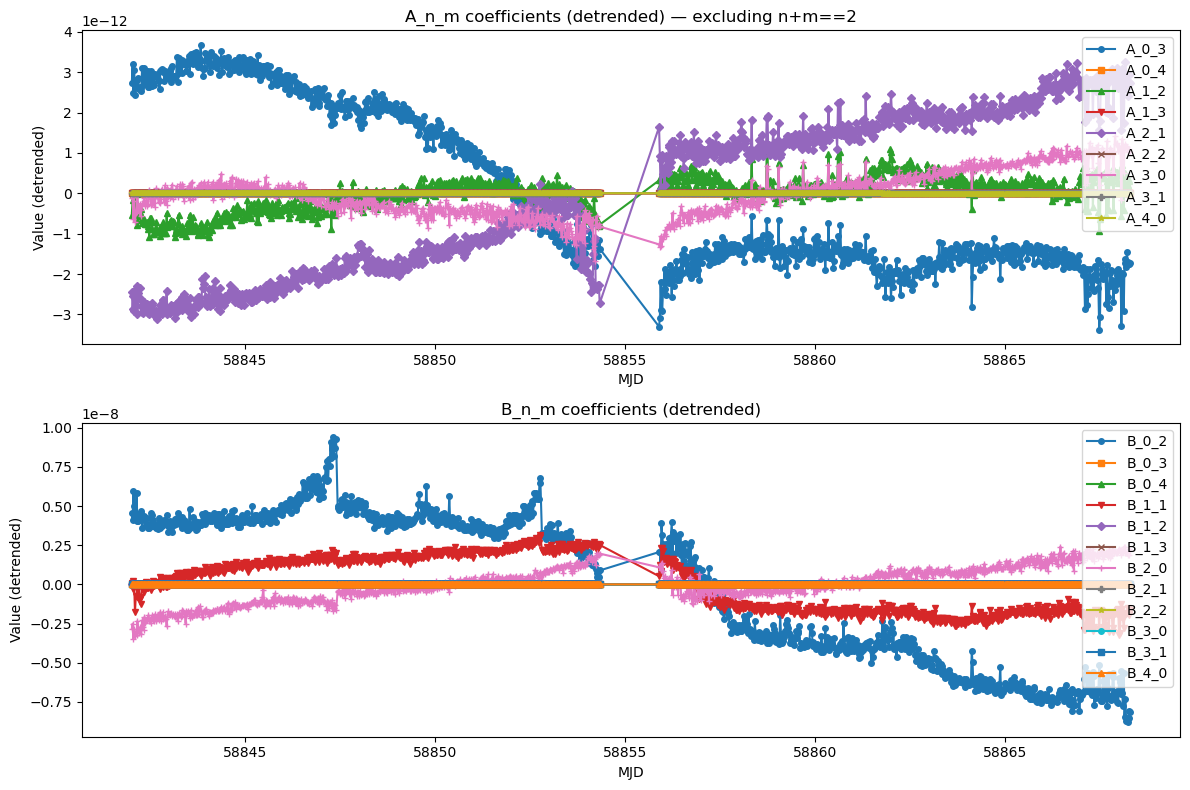

In [52]:
# Plot A_n_m and B_n_m coefficient series similarly to the CD* plot above, using MJD as x-axis
# (re-uses Time if needed from earlier cells)

if "MJD" not in df.columns:
    if "DATE-OBS" in df.columns:
        df["MJD"] = pd.NA
        date_vals = df["DATE-OBS"].astype(str).replace({"None": None, "nan": None})
        mask = date_vals.notna()
        if mask.any():
            try:
                t = Time(date_vals[mask].tolist())
                df.loc[mask, "MJD"] = t.mjd
            except Exception:
                dt = pd.to_datetime(df["DATE-OBS"], errors="coerce")
                mask2 = dt.notna()
                if mask2.any():
                    t = Time(dt[mask2].astype("datetime64[ns]"))
                    df.loc[mask2, "MJD"] = t.mjd
        df["MJD"] = pd.to_numeric(df["MJD"], errors="coerce")
    else:
        df["MJD"] = pd.NA

# regex to match coefficient-like keys
coeff_re = re.compile(r"^[AB]_[0-9]+_[0-9]+$")

# collect and sort A_ and B_ columns
a_cols = sorted([c for c in df.columns if coeff_re.match(c) and c.startswith("A_")])
b_cols = sorted([c for c in df.columns if coeff_re.match(c) and c.startswith("B_")])


# remove A_n_m where n + m == 2
def nm_sum_is_two(col):
    m = re.match(r"^A_(\d+)_(\d+)$", col)
    if not m:
        return False
    return (int(m.group(1)) + int(m.group(2))) == 2


a_cols = [c for c in a_cols if not nm_sum_is_two(c)]

if not a_cols and not b_cols:
    raise KeyError("No A_n_m or B_n_m columns found in dataframe")

x = df["MJD"]
mask_common = x.notna()

if not mask_common.any():
    raise RuntimeError("No valid MJD values for coefficient plotting")


# convenience for plotting a collection of columns on an axis
def plot_coeffs(ax, cols, title):
    if not cols:
        return
    # convert to numeric and detrend (subtract mean)
    data = df[cols].apply(pd.to_numeric, errors="coerce")
    for i, col in enumerate(cols):
        y = data[col] - np.nanmean(data[col])
        # align mask to x
        mask = x.notna() & y.notna()
        if not mask.any():
            continue
        marker = ["o", "s", "^", "v", "D", "x", "+", "P", "*"][i % 9]
        ax.plot(x[mask].astype(float), y[mask], marker=marker, linestyle="-", label=col, markersize=4)
    ax.set_xlabel("MJD")
    ax.set_ylabel("Value (detrended)")
    ax.set_title(title)
    ax.legend(loc="upper right")


# create subplots: one for A_*, one for B_*
nplots = 1 if (a_cols and not b_cols) or (b_cols and not a_cols) else 2
fig, axes = plt.subplots(nplots, 1, figsize=(12, 4 * nplots), squeeze=False)

if a_cols and b_cols:
    plot_coeffs(axes[0, 0], a_cols, "A_n_m coefficients (detrended) — excluding n+m==2")
    plot_coeffs(axes[1, 0], b_cols, "B_n_m coefficients (detrended)")
else:
    cols = a_cols if a_cols else b_cols
    title = "A_n_m coefficients (detrended) — excluding n+m==2" if a_cols else "B_n_m coefficients (detrended)"
    plot_coeffs(axes[0, 0], cols, title)

fig.tight_layout()
plt.show()


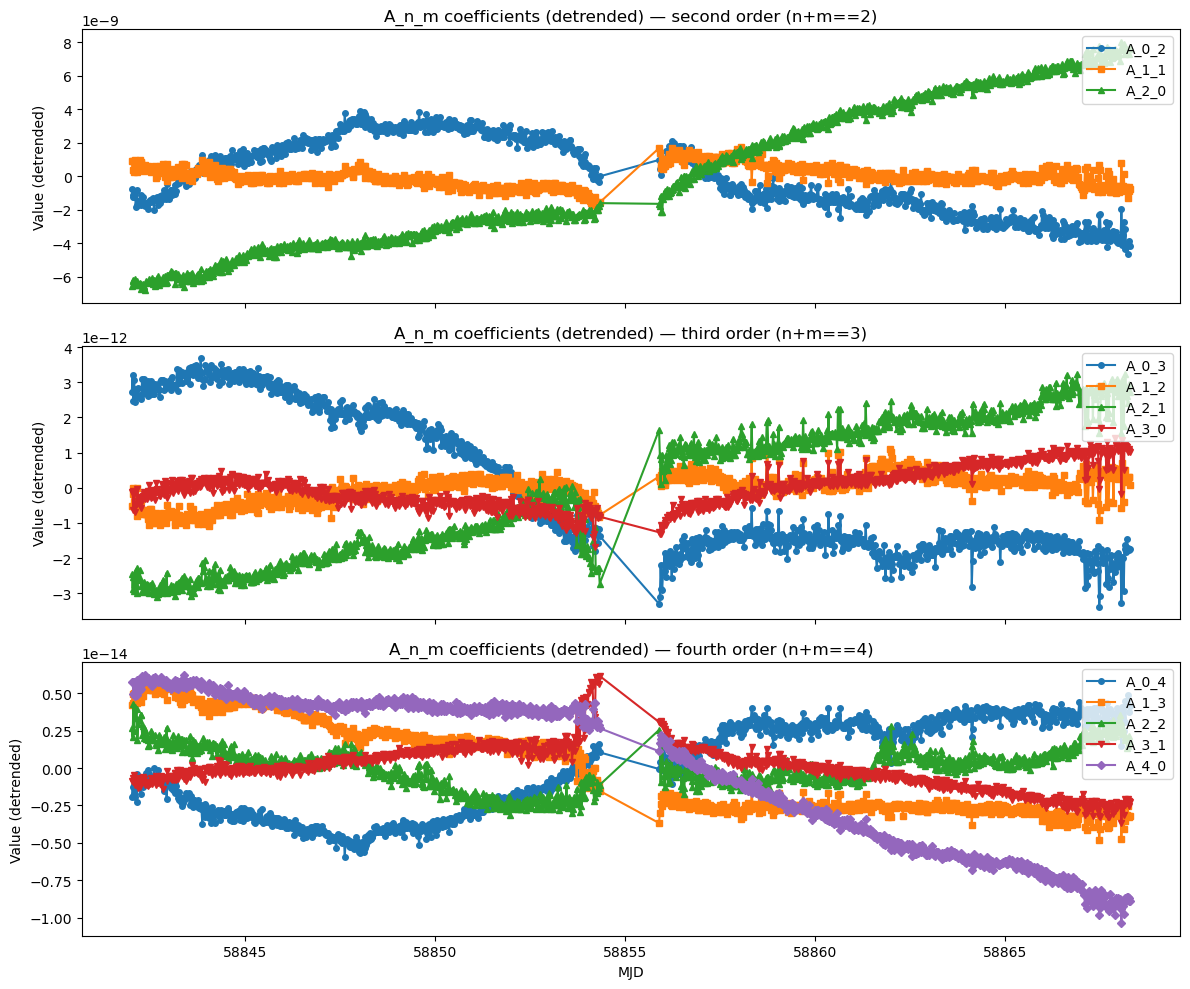

In [53]:
# Plot only A_n_m coefficients for orders n+m == 2, 3, 4 (stacked)
coeff_re = re.compile(r"^A_[0-9]+_[0-9]+$")
a_cols = sorted([c for c in df.columns if coeff_re.match(c)])


def nm_sum(col):
    m = re.match(r"^A_(\d+)_(\d+)$", col)
    return (int(m.group(1)) + int(m.group(2))) if m else None


orders = {2: [c for c in a_cols if nm_sum(c) == 2], 3: [c for c in a_cols if nm_sum(c) == 3], 4: [c for c in a_cols if nm_sum(c) == 4]}

x = df["MJD"]
if x.notna().sum() == 0:
    raise RuntimeError("No valid MJD values for coefficient plotting")

markers = ["o", "s", "^", "v", "D", "x", "+", "P", "*"]

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for ax, order in zip(axes, (2, 3, 4)):
    cols = orders[order]
    title_suffix = {2: "second order (n+m==2)", 3: "third order (n+m==3)", 4: "fourth order (n+m==4)"}[order]
    ax.set_title(f"A_n_m coefficients (detrended) — {title_suffix}")
    if not cols:
        ax.text(0.5, 0.5, f"No A_n_m columns with n+m=={order}", ha="center", va="center", transform=ax.transAxes)
        ax.set_ylabel("Value (detrended)")
        continue

    data = df[cols].apply(pd.to_numeric, errors="coerce")
    for i, col in enumerate(cols):
        y = data[col] - np.nanmean(data[col])
        mask = x.notna() & y.notna()
        if not mask.any():
            continue
        ax.plot(x[mask].astype(float), y[mask], marker=markers[i % len(markers)], linestyle="-", label=col, markersize=4)
    ax.set_ylabel("Value (detrended)")
    ax.legend(loc="upper right")

axes[-1].set_xlabel("MJD")
fig.tight_layout()
plt.show()

In [54]:
# from A_2_0
1.5e-8 * 1000**2, 7e-12 * 1000**3, 1.5e-14 * 1000**4

(0.015, 0.007, 0.015)